In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('Win_Prediction_Data.xlsx')

In [3]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [4]:
len(df.select_dtypes(object).columns)

7

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [6]:
df['Client Category'].isnull().sum()

79

In [7]:
df['Client Category'].fillna(value=df['Client Category'].mode()[0], inplace=True)

In [8]:
df['Client Category'].isnull().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   10061 non-null  object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [10]:
# # df.drop(columns="Deal Date", inplace=True)
# df.drop(columns="Solution Type", inplace=True)
# df.drop(columns="Sector", inplace=True)
# df.drop(columns="Location", inplace=True)
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [11]:
df.head(5)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [12]:
# df['Location'].describe()

In [13]:
def calcu_lf_uf(q1, q3):
    IQR = q3-q1
    lf = q1-(1.5*IQR)
    uf = q3+(1.5*IQR)
    print("lf-->", lf, "uf-->", uf)
    return [lf, uf]

In [14]:
df.describe()

,Deal Date,Deal Cost
count,10061,1.006100e+04
mean,2016-04-07 04:10:11.151973120,7.668969e+05
min,2011-04-19 00:00:00,0.000000e+00
25%,2014-11-29 00:00:00,1.897059e+05
50%,2016-06-23 00:00:00,3.823529e+05
75%,2017-12-03 00:00:00,7.647059e+05
max,2019-06-07 00:00:00,3.676471e+07
std,NaN,1.619894e+06


In [15]:
[lf, uf] = calcu_lf_uf(1.897059e+05, 7.647059e+05)

lf--> -672794.1 uf--> 1627205.9


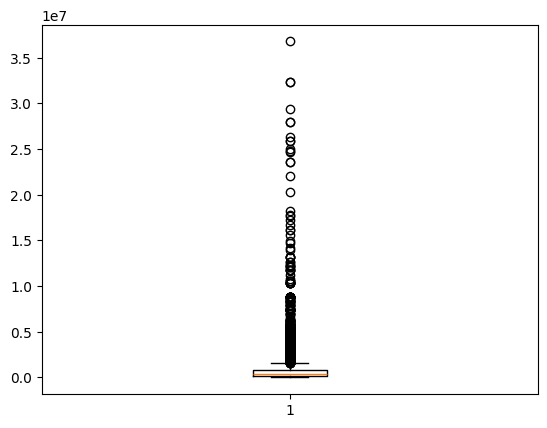

In [16]:
plt.boxplot(df['Deal Cost'])
plt.show()

In [17]:
df['Deal Cost'] = np.where(df['Deal Cost']>uf, uf, df['Deal Cost'])
df['Deal Cost'] = np.where(df['Deal Cost']<lf, lf, df['Deal Cost'])

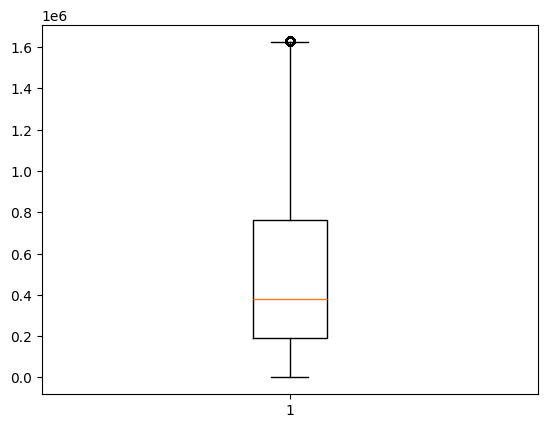

In [18]:
plt.boxplot(df['Deal Cost'])
plt.show()

In [19]:
df.select_dtypes(object).columns

Index(['Client Category', 'Solution Type', 'Sector', 'Location', 'VP Name',
       'Manager Name', 'Deal Status Code'],
      dtype='object')

In [38]:
df1 = pd.get_dummies(df, columns=["Client Category"], drop_first=True)
# df2 = pd.get_dummies(df1, columns=["Solution Type"], drop_first=True)
# df3 = pd.get_dummies(df2, columns=["Sector"], drop_first=True)
# df4 = pd.get_dummies(df3, columns=["Location"], drop_first=True)
df2 = pd.get_dummies(df1, columns=["VP Name"], drop_first=True)
df3 = pd.get_dummies(df2, columns=["Manager Name"], drop_first=True)
df4 = pd.get_dummies(df3, columns=["Deal Status Code"], drop_first=True)


In [39]:
df4.head(10)

,Solution Type,Deal Date,Sector,Location,Deal Cost,Client Category_Automobiles,Client Category_Consulting,Client Category_Consumer Good,Client Category_Domestic Bank,Client Category_Domestic Private Bank,...,Manager Name_sharat chandran,Manager Name_sheak shakir,Manager Name_shiv kumar,Manager Name_shiv shakti singh,Manager Name_shyam kumar,Manager Name_som dutt,Manager Name_sunder paal,Manager Name_vansu dev,Manager Name_vinit katariya,Deal Status Code_Won
0,Solution 7,2012-03-27,Sector 24,L5,150000.00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,Solution 7,2012-09-25,Sector 24,L5,744705.88,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,Solution 59,2011-08-01,Sector 20,Others,60000.00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Solution 59,2011-04-28,Sector 20,Others,60000.00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Solution 32,2011-06-03,Sector 20,Others,80882.35,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Solution 32,2011-05-24,Sector 20,Others,80882.35,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,Solution 59,2011-11-03,Sector 2,L10,526176.47,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7,Solution 7,2012-09-17,Sector 13,L5,409705.88,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,Solution 42,2012-04-11,Sector 12,L10,1032352.94,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
9,Solution 59,2011-11-17,Sector 20,Others,558823.53,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Columns: 365 entries, Solution Type to Deal Status Code_Won
dtypes: bool(360), datetime64[ns](1), float64(1), object(3)
memory usage: 3.8+ MB


In [51]:
df4.head()

,Solution Type,Deal Date,Sector,Location,Deal Cost,Client Category_Automobiles,Client Category_Consulting,Client Category_Consumer Good,Client Category_Domestic Bank,Client Category_Domestic Private Bank,...,Manager Name_shafibul,Manager Name_sharat chandran,Manager Name_sheak shakir,Manager Name_shiv kumar,Manager Name_shiv shakti singh,Manager Name_shyam kumar,Manager Name_som dutt,Manager Name_sunder paal,Manager Name_vansu dev,Manager Name_vinit katariya
0,Solution 7,2012-03-27,Sector 24,L5,150000.00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Solution 7,2012-09-25,Sector 24,L5,744705.88,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Solution 59,2011-08-01,Sector 20,Others,60000.00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Solution 59,2011-04-28,Sector 20,Others,60000.00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Solution 32,2011-06-03,Sector 20,Others,80882.35,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
list = df4.columns

In [42]:
list = list[0:len(list)-1]

In [43]:
list

Index(['Solution Type', 'Deal Date', 'Sector', 'Location', 'Deal Cost',
       'Client Category_Automobiles', 'Client Category_Consulting',
       'Client Category_Consumer Good', 'Client Category_Domestic Bank',
       'Client Category_Domestic Private Bank',
       ...
       'Manager Name_shafibul', 'Manager Name_sharat chandran',
       'Manager Name_sheak shakir', 'Manager Name_shiv kumar',
       'Manager Name_shiv shakti singh', 'Manager Name_shyam kumar',
       'Manager Name_som dutt', 'Manager Name_sunder paal',
       'Manager Name_vansu dev', 'Manager Name_vinit katariya'],
      dtype='object', length=364)

In [50]:
y = df4['Deal Status Code']
x = df4.drop(columns="Deal Status Code_Won")

KeyError: 'Deal Status Code_Won'

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=88)

In [46]:
# model = LinearRegression()
Log_model = LogisticRegression()
Decision_model = DecisionTreeClassifier()
Random_model = RandomForestClassifier()

In [47]:
Log_model.fit(x_train, y_train)

ValueError: could not convert string to float: 'Solution 11'

In [ ]:
Decision_model.fit(x_train, y_train)

In [ ]:
Random_model.fit(x_train, y_train)

In [ ]:
print(Log_model.score(x_train, y_train))

In [ ]:
print(Log_model.score(x_test, y_test))

In [ ]:
print(Decision_model.score(x_train, y_train))

In [ ]:
print(Decision_model.score(x_test, y_test))

In [ ]:
print(Random_model.score(x_train, y_train))

In [ ]:
print(Random_model.score(x_test, y_test))

In [ ]:
# md = [1,2, 3, 4, 5, 6, 7, 8, 9, 10]
# mss = [10, 20, 30, 40, 50, 60, 70, 80]

# for i in md:
#     for j in mss:
#         dt1 = DecisionTreeClassifier(max_depth=i, min_samples_split=j, min_samples_leaf=1, random_state=88)
#         dt1.fit(x_train, y_train)
#         print("max_depth {} min_sample {}".format(i, j))
#         print("**************************************")
#         print("accuracy train", dt1.score(x_train, y_train))
#         print("Test Accuracy", dt1.score(x_test, y_test))
#         print("-----------------------------------------")

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(y_train, Decision_model.predict(x_train)))

In [ ]:
print(metrics.classification_report(y_test, Decision_model.predict(x_test)))

In [ ]:
print(metrics.classification_report(y_train, Random_model.predict(x_train)))

In [ ]:
print(metrics.classification_report(y_test, Random_model.predict(x_test)))